In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import scipy.stats as st
from scipy.stats import linregress

# File to Load (Remember to Change These)
file_mex = "200906COVID19MEXICO.csv"
mex_data = pd.read_csv(file_mex, encoding= 'unicode_escape')
mex_data



# File and store into Pandas data frame


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-09-06,059369,2,4,25,1,25,25,1,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1,2020-09-06,0e85b3,2,4,9,2,12,9,17,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-09-06,07d239,2,3,15,1,9,15,106,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
3,2020-09-06,1b6ee6,2,4,23,1,30,23,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-09-06,0cb658,2,4,9,1,9,15,58,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431628,2020-09-06,079319,2,12,15,2,15,15,48,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
1431629,2020-09-06,1bf8c0,2,4,19,1,19,19,12,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1431630,2020-09-06,047a3d,2,9,5,2,5,5,9,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97
1431631,2020-09-06,0c645b,1,9,9,1,9,15,81,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97


In [2]:
mex_data.count()

FECHA_ACTUALIZACION    1431633
ID_REGISTRO            1431633
ORIGEN                 1431633
SECTOR                 1431633
ENTIDAD_UM             1431633
SEXO                   1431633
ENTIDAD_NAC            1431633
ENTIDAD_RES            1431633
MUNICIPIO_RES          1431633
TIPO_PACIENTE          1431633
FECHA_INGRESO          1431633
FECHA_SINTOMAS         1431633
FECHA_DEF              1431633
INTUBADO               1431633
NEUMONIA               1431633
EDAD                   1431633
NACIONALIDAD           1431633
EMBARAZO               1431633
HABLA_LENGUA_INDIG     1431633
DIABETES               1431633
EPOC                   1431633
ASMA                   1431633
INMUSUPR               1431633
HIPERTENSION           1431633
OTRA_COM               1431633
CARDIOVASCULAR         1431633
OBESIDAD               1431633
RENAL_CRONICA          1431633
TABAQUISMO             1431633
OTRO_CASO              1431633
RESULTADO              1431633
MIGRANTE               1431633
PAIS_NAC

In [3]:
mex_sex = mex_data.drop(['FECHA_ACTUALIZACION',
'ORIGEN',
'SECTOR',
'ENTIDAD_UM',
'ENTIDAD_NAC',
'ENTIDAD_RES',
'MUNICIPIO_RES',
'TIPO_PACIENTE',
'FECHA_INGRESO',
'FECHA_SINTOMAS',
'FECHA_DEF',
'INTUBADO',
'NEUMONIA',
'EDAD',
'NACIONALIDAD',
'EMBARAZO',
'HABLA_LENGUA_INDIG',
'DIABETES',
'EPOC',
'ASMA',
'INMUSUPR',
'HIPERTENSION',
'OTRA_COM',
'CARDIOVASCULAR',
'OBESIDAD',
'RENAL_CRONICA',
'TABAQUISMO',
'OTRO_CASO',
'RESULTADO',
'MIGRANTE',
'PAIS_NACIONALIDAD',
'PAIS_ORIGEN',
'UCI',
], axis=1)
mex_sex = mex_sex.dropna(subset=['SEXO'])

mex_sex = mex_sex.groupby(['SEXO'])
msex_plot = mex_sex.count()


In [5]:
msex_plot = msex_plot.rename(index={1: 'male'})
msex_plot = msex_plot.rename(index={2: 'female'})

msex_plot

,ID_REGISTRO
SEXO,
male,726460
female,705173


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200A26A01F0>],
      dtype=object)

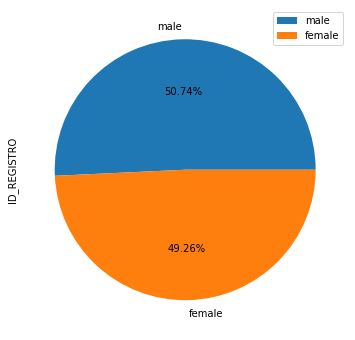

In [6]:
msex_plot.plot.pie(subplots=True,autopct="%1.2f%%", figsize=(11, 6))


In [20]:
mex_age = mex_data.drop(['FECHA_ACTUALIZACION',
'ORIGEN',
'SECTOR',
'ENTIDAD_UM',
'ENTIDAD_NAC',
'ENTIDAD_RES',
'MUNICIPIO_RES',
'TIPO_PACIENTE',
'FECHA_INGRESO',
'FECHA_SINTOMAS',
'FECHA_DEF',
'INTUBADO',
'NEUMONIA',
'SEXO',
'NACIONALIDAD',
'EMBARAZO',
'HABLA_LENGUA_INDIG',
'DIABETES',
'EPOC',
'ASMA',
'INMUSUPR',
'HIPERTENSION',
'OTRA_COM',
'CARDIOVASCULAR',
'OBESIDAD',
'RENAL_CRONICA',
'TABAQUISMO',
'OTRO_CASO',
'RESULTADO',
'MIGRANTE',
'PAIS_NACIONALIDAD',
'PAIS_ORIGEN',
'UCI'
], axis=1)
mex_age = mex_age.dropna(subset=['EDAD'])
mex_age['Age group'] = pd.cut(mex_age.EDAD,
                            bins = [0,9,19,29,39,49,59,69,79,120], labels = ['<10', '10-19', '20-29', '30-39', '40-49','50-59', '60-69', '70-79','+80'])
mex_age = mex_age.drop(['EDAD'], axis = 1)
mx_age = mex_age.groupby(['Age group'])
mage_plot = mx_age.count()
mage_plot

,ID_REGISTRO
Age group,
<10,24541
10-19,53628
20-29,253590
30-39,338776
40-49,303068
50-59,227761
60-69,128429
70-79,64668
+80,30772


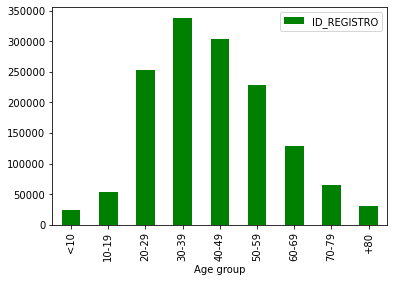

In [29]:
mage_plot.plot(kind="bar", color = 'green' )




(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

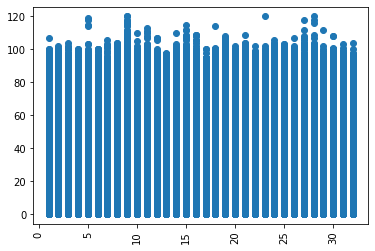

In [8]:
plt.scatter(mex_data['ENTIDAD_UM'], mex_data ['EDAD'], )
plt.xticks(rotation=90)


In [14]:
mex_corr = mex_data.corr()
mc = mex_corr.unstack().sort_values()
mc.head(40)


INTUBADO       TIPO_PACIENTE   -0.999582
TIPO_PACIENTE  INTUBADO        -0.999582
               UCI             -0.999579
UCI            TIPO_PACIENTE   -0.999579
MIGRANTE       NACIONALIDAD    -0.902675
NACIONALIDAD   MIGRANTE        -0.902675
SECTOR         OTRO_CASO       -0.517981
OTRO_CASO      SECTOR          -0.517981
MIGRANTE       ENTIDAD_NAC     -0.517253
ENTIDAD_NAC    MIGRANTE        -0.517253
TIPO_PACIENTE  NEUMONIA        -0.457971
NEUMONIA       TIPO_PACIENTE   -0.457971
EDAD           INTUBADO        -0.321149
INTUBADO       EDAD            -0.321149
EDAD           UCI             -0.321034
UCI            EDAD            -0.321034
OTRO_CASO      UCI             -0.268591
UCI            OTRO_CASO       -0.268591
OTRO_CASO      INTUBADO        -0.268553
INTUBADO       OTRO_CASO       -0.268553
SECTOR         TIPO_PACIENTE   -0.251704
TIPO_PACIENTE  SECTOR          -0.251704
               ORIGEN          -0.207502
ORIGEN         TIPO_PACIENTE   -0.207502
EDAD           N

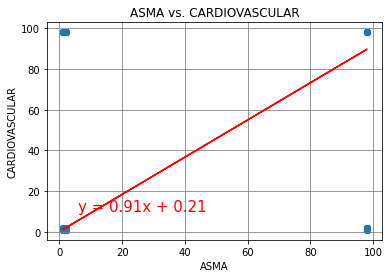

'y = 0.91x + 0.21'

In [12]:
x_values = mex_data['ASMA'].astype('float')
y_values = mex_data['CARDIOVASCULAR'].astype('float')

(slope, intercept,rvalue,pvalue,stderr)= linregress(x_values, y_values)
regress_values = x_values *slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))


label = "ASMA vs. CARDIOVASCULAR"
plt.scatter(x_values,y_values)
plt.xlabel('ASMA')
plt.ylabel('CARDIOVASCULAR')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title(label, fontdict=None, loc='center', pad=None)

plt.plot(x_values, regress_values, "r-")
plt.annotate (line_eq,(6,10), fontsize =15, color = "r" )
plt.show()

line_eq 

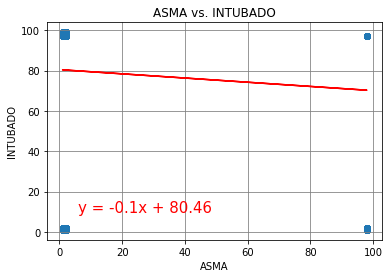

'y = -0.1x + 80.46'

In [13]:
x_values = mex_data['ASMA'].astype('float')
y_values = mex_data['INTUBADO'].astype('float')

(slope, intercept,rvalue,pvalue,stderr)= linregress(x_values, y_values)
regress_values = x_values *slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))


label = "ASMA vs. INTUBADO"
plt.scatter(x_values,y_values)
plt.xlabel('ASMA')
plt.ylabel('INTUBADO')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title(label, fontdict=None, loc='center', pad=None)

plt.plot(x_values, regress_values, "r-")
plt.annotate (line_eq,(6,10), fontsize =15, color = "r" )
plt.show()

line_eq 

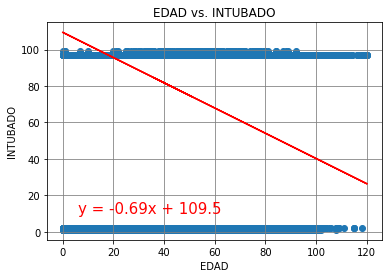

'y = -0.69x + 109.5'

In [15]:
x_values = mex_data['EDAD'].astype('float')
y_values = mex_data['INTUBADO'].astype('float')

(slope, intercept,rvalue,pvalue,stderr)= linregress(x_values, y_values)
regress_values = x_values *slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))


label = "EDAD vs. INTUBADO"
plt.scatter(x_values,y_values)
plt.xlabel('EDAD')
plt.ylabel('INTUBADO')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.title(label, fontdict=None, loc='center', pad=None)

plt.plot(x_values, regress_values, "r-")
plt.annotate (line_eq,(6,10), fontsize =15, color = "r" )
plt.show()

line_eq 